# K-최근접 이웃(KNN)
KNN은 널리 쓰이는 지도 학습 머신 러닝 모델이며 특정 샘플 주위의 샘플들의 클래스를 고려하여 특정 샘플의 클래스를 예측한다.
장점으로는 단순한 알고리즘, 사전 학습 및 준비 과정이 필요하지 않다는 점이 있다.

In [3]:
# 특정 샘플에서 가장 가까운 K개의 샘플(이웃) 찾기
# 가장 간단한 예시 코드

from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 데이터셋 가져오기
iris = datasets.load_iris()
features = iris.data

# 표준화 객체 만들기
standardizer = StandardScaler()

# 특성 표준화하기
features_standardized = standardizer.fit_transform(features)

# K=2인 최근접 이웃 모델 만들기
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# 새로운 샘플을 만들기
new_observation = [1, 1, 1, 1]

# 이 샘플과 가장 가까운 이웃의 인덱스와 거리를 찾기
distance, indices = nearest_neighbors.kneighbors( [new_observation] )

# 최근접 이웃을 확인
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)

X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

def iris_KNN(X, y, K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    KNN = KNeighborsClassifier(n_neighbors=K)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

K = 3
scores = iris_KNN(X, y, K)
print( 'n_neighbors가 {0:d}일때 정확도 : {1:.3f}'.format(K, scores) )

n_neighbors가 3일때 정확도 : 0.978


In [18]:
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=K)
KNN.fit(iris.data, iris.target)
classes = { 0:'setosa', 1:'versicolor', 2:'virginica' }

# 새로운 데이터
X = [ [4,2,1.3,0.4], [4,3,3.2,2.2] ]
y = KNN.predict(X)

print( '{}특성을 가지는 품종 : {}'.format( X[0], classes[y[0]] ) )
print( '{}특성을 가지는 품종 : {}'.format( X[1], classes[y[1]] ) )

y_pred_all = KNN.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print( 'n_neighbors가 {0:d}일때 정확도 : {1:.3f}'.format(K, scores) )

[4, 2, 1.3, 0.4]특성을 가지는 품종 : setosa
[4, 3, 3.2, 2.2]특성을 가지는 품종 : versicolor
n_neighbors가 3일때 정확도 : 0.960


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

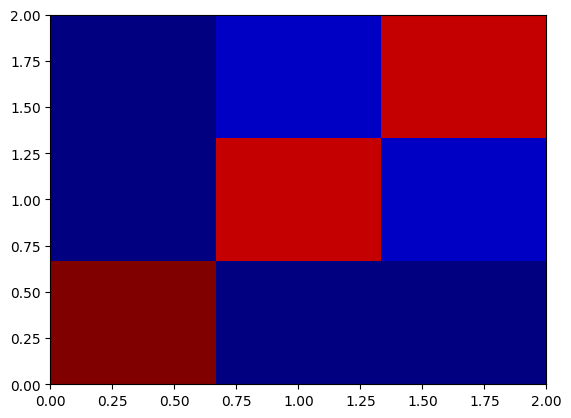

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)
conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat